In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

READING OF DATA SETS


In [5]:
athlete = pd.read_csv("/content/athlete_events.csv.crdownload")
noc = pd.read_csv("/content/noc_regions.csv")

CREATING COPY OF DATAFRAME

In [6]:
ath=athlete.copy()
nat=noc.copy()

DATA EXPLORATION

In [7]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
ath.tail()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
39614,20375,Cheng Ran,F,27.0,184.0,77.0,China,CHN,2004 Summer,2004,Summer,Athina,Rowing,Rowing Women's Coxed Eights,NaN
39615,20376,Cheng Shao-Chieh,F,18.0,158.0,47.0,Chinese Taipei,TPE,2004 Summer,2004,Summer,Athina,Badminton,Badminton Women's Singles,NaN
39616,20376,Cheng Shao-Chieh,F,22.0,158.0,47.0,Chinese Taipei,TPE,2008 Summer,2008,Summer,Beijing,Badminton,Badminton Women's Singles,NaN
39617,20376,Cheng Shao-Chieh,F,26.0,158.0,47.0,Chinese Taipei,TPE,2012 Summer,2012,Summer,London,Badminton,Badminton Women's Singles,NaN
39618,20377,Cheng Sheng-Teh,M,23.0,176.0,90.0,Chinese Taipei,TPE,1964 Summer,1964,Summer,Tokyo,Weightlifting,W,NaN


In [10]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [12]:
ath.head(1)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [13]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39619 entries, 0 to 39618
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39619 non-null  int64  
 1   Name    39619 non-null  object 
 2   Gender  39619 non-null  object 
 3   Age     38157 non-null  float64
 4   Height  30590 non-null  float64
 5   Weight  30120 non-null  float64
 6   Team    39619 non-null  object 
 7   NOC     39619 non-null  object 
 8   Games   39619 non-null  object 
 9   Year    39619 non-null  int64  
 10  Season  39619 non-null  object 
 11  City    39619 non-null  object 
 12  Sport   39619 non-null  object 
 13  Event   39619 non-null  object 
 14  Medal   5416 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 4.5+ MB


In [14]:
ath.describe()

,ID,Age,Height,Weight,Year
count,39619.000000,38157.000000,30590.000000,30120.000000,39619.000000
mean,10383.786113,25.556805,175.519810,70.918127,1978.310306
std,5801.236418,6.364443,10.372016,14.252623,29.745452
min,1.000000,12.000000,127.000000,32.000000,1896.000000
25%,5421.500000,21.000000,169.000000,61.000000,1960.000000
50%,10441.000000,24.000000,175.000000,70.000000,1988.000000
75%,15342.500000,28.000000,183.000000,79.000000,2002.000000
max,20377.000000,84.000000,223.000000,214.000000,2016.000000


In [16]:
ath.shape

(39619, 15)

In [19]:
ath.isnull().sum()

ID            0
Name          0
Gender        0
Age        1462
Height     9029
Weight     9499
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     34203
dtype: int64

DATA CLEANING AND DATA MANIPULATION

In [20]:
#1. ADD A NEW COLUMN "REGION" TO ATH DATAFRAME AND REGION COLUMN SHOULD HAVE THE REGIONS ACCORDING TO THE ELEMENTS IN THE NOC COLUMN OF "NAT" DATAFRAME.
region_col=ath["NOC"].map(nat.set_index("NOC")["region"])
ath.insert(7,"Region",region_col)          #as indexing starts from 0

In [21]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,Region,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39614,20375,Cheng Ran,F,27.0,184.0,77.0,China,China,CHN,2004 Summer,2004,Summer,Athina,Rowing,Rowing Women's Coxed Eights,NaN
39615,20376,Cheng Shao-Chieh,F,18.0,158.0,47.0,Chinese Taipei,Taiwan,TPE,2004 Summer,2004,Summer,Athina,Badminton,Badminton Women's Singles,NaN
39616,20376,Cheng Shao-Chieh,F,22.0,158.0,47.0,Chinese Taipei,Taiwan,TPE,2008 Summer,2008,Summer,Beijing,Badminton,Badminton Women's Singles,NaN
39617,20376,Cheng Shao-Chieh,F,26.0,158.0,47.0,Chinese Taipei,Taiwan,TPE,2012 Summer,2012,Summer,London,Badminton,Badminton Women's Singles,NaN


In [22]:
#2.DROP THE COLUMN "NOC" FROM ATH DATAFRAME
ath.drop("NOC",inplace=True,axis=1)

In [23]:
#3.Handling the null values in the columns - "Age", "Height" & "Weight" by the mean of the respective columns.
ath.isnull().sum()

ID            0
Name          0
Gender        0
Age        1462
Height     9029
Weight     9499
Team          0
Region       42
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     34203
dtype: int64

In [26]:
ath["Age"].fillna(ath.Age.mean(),inplace=True)
ath["Height"].fillna(ath.Height.mean(),inplace=True)
ath["Weight"].fillna(ath.Weight.mean(),inplace=True)

In [27]:
ath.iloc[12]

ID                                                        6
Name                                        Per Knut Aaland
Gender                                                    M
Age                                                    31.0
Height                                                188.0
Weight                                                 75.0
Team                                          United States
Region                                                  USA
Games                                           1992 Winter
Year                                                   1992
Season                                               Winter
City                                            Albertville
Sport                                  Cross Country Skiing
Event     Cross Country Skiing Men's 10/15 kilometres Pu...
Medal                                                   NaN
Name: 12, dtype: object

In [28]:
ath.isnull().sum()

ID            0
Name          0
Gender        0
Age           0
Height        0
Weight        0
Team          0
Region       42
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     34203
dtype: int64

In [31]:
#4. List out all the values of the region columns where the values are null.
ath[ath.Region.isna()].head()

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21.0,175.51981,70.918127,Singapore,NaN,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25.0,175.51981,70.918127,Singapore,NaN,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.00000,68.000000,Singapore,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
6267,3515,Paulo Amotun Lokoro,M,24.0,170.00000,61.000000,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7659,4264,Ang Peng Siong,M,21.0,180.00000,75.000000,Singapore,NaN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN


In [32]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [33]:
nat.where(nat["region"]=="Singapore")

,NOC,region,notes
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
225,NaN,NaN,NaN
226,NaN,NaN,NaN
227,NaN,NaN,NaN
228,NaN,NaN,NaN


Handling All the NULL values in "Medals"

In [34]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.51981,70.918127,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.51981,70.918127,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [37]:
#categories of the medals
ath["Medal"].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [38]:
ath["Medal"].value_counts()

Gold      1857
Silver    1811
Bronze    1748
Name: Medal, dtype: int64

In [49]:
# Replace
# NaN with 0
# Gold with 1
# Silver with 2
# Bronze with 3

ath['Medal'].replace([np.nan],[0], inplace=True)


In [50]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,1
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,1
2,3,Gunnar Nielsen Aaby,M,24.0,175.51981,70.918127,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,1
3,4,Edgar Lindenau Aabye,M,34.0,175.51981,70.918127,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,1


In [53]:
#dropping off the un-wanted/irrelavant columns
ath.drop(["Region","Games"],axis=1,inplace=True)

In [55]:
for i,j in zip(ath.Sport,range(len(ath.Event))):
  ath.Event[j] = re.sub(f"{i}\s","",ath.Event[j])

<ipython-input-55-e471ddc382cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath.Event[j] = re.sub(f"{i}\s","",ath.Event[j])


EXPORTATION OF DATAFRAME

In [56]:
# Export to JSON
ath.to_json("athletes_dataset.json")

# Export to Excel
ath.to_excel("athletes_dataset.xlsx")

# Export to .CSV
ath.to_csv("athletes_dataset.csv")

DATA ANALYSIS

Text(0, 0.5, 'Weight')

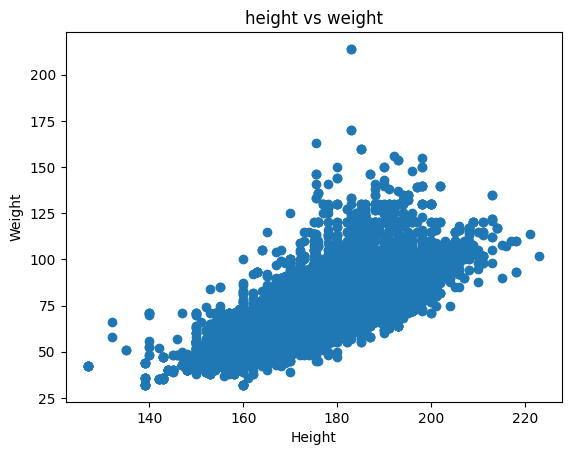

In [58]:
#1. Show the relationship between Height and Weight
x=ath.Height
y=ath.Weight
plt.scatter(x,y)
plt.title("height vs weight")
plt.xlabel("Height")
plt.ylabel("Weight")

<Axes: >

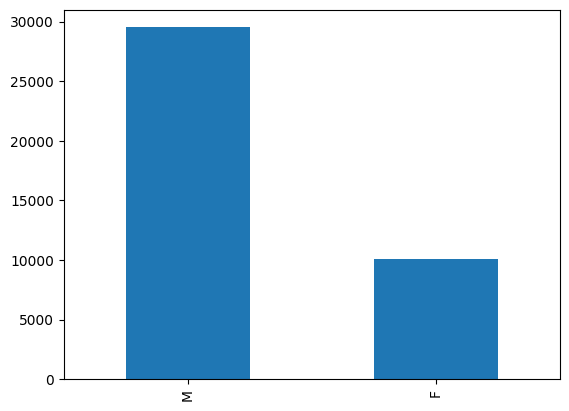

In [61]:
#2. Find out how many male and female had participated in the Olympics during 1896 to 2016
ath["Gender"].value_counts().plot.bar(ath["Gender"])

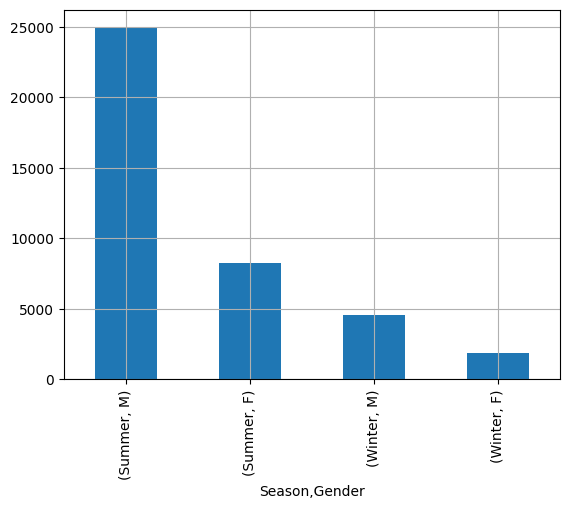

In [62]:
#3. How many Male and Female have participated in the Summer and Winter Olympics
ath['Gender'].groupby(ath['Season']).value_counts().plot.bar(ath['Gender'])
plt.grid()
plt.show()

In [66]:
import plotly.express as px

In [70]:
fig = px.histogram(ath, x=ath.Season, color=ath.Gender)
fig.show()